
<br>
    The objective of this exercise is that you analyse the code provided and<br>
    make the link with the curse. You have to provide a short report that<br>
    comments and analyse the results. You can use directly the results or adapt<br>
    them to you needs.<br>


import the numerical library

In [1]:
import numpy as np
# import signal processing library
import scipy.signal as sp
# import ploting library
import pylab as py
py.ion()
py.close('all')

load the ecg signal

In [2]:
x = np.genfromtxt('respiration.dat')
# sampling frequency of the signal is 500 Hz
fs = 2
# generate correponding time vector
t = np.arange(len(x))/fs


 <br>
    The signal is a measurement of the breathing obtained by inductance<br>
    plethysmography.<br>
    The objective is to estimate the breathing frequency.<br>



 <br>
    The Hilbert transforms permits to estimate the instaneous amplitude and<br>
    phase of a narrow band signal. <br>
    Q: Comment the figures.<br>
    <b>Answer:</b>
    The figure shows the raw breathing signal, which contains an oscillatory pattern from inhalation/exhalation cycles, and its Hilbert envelope showing the instantaneous amplitude of this oscillation. Since the raw signal is not narrowband (contains noise, drifts, and harmonics) it looks irregular, and the envelope does not match every peak perfectly.
    <br>
    Q: Why the envelope does not follow the maxima of the signal<br>
    <b>Answer:</b>
   In this plot, the envelope does trach the peaks of the signal but does not drop to the minima. This is because it represents the instantaneous amplitude, which is always non-negative since it measures overall magnitude of the oscillation at each moment, not actual waveforms values at each point. 
    <br>

compute the analytical signal of x (Hilbert transform)

In [3]:
xa = sp.hilbert(x)

plot the signal

Text(0.5, 1.0, 'Breathing signal')

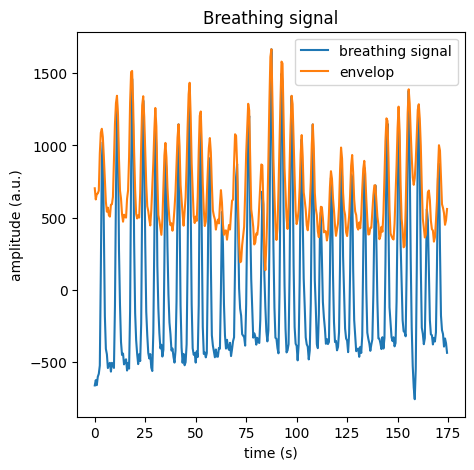

In [4]:
py.figure(1, figsize=[5,5])
py.clf()
py.plot(t, x, label='breathing signal')
py.plot(t, np.abs(xa), label='envelop')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.legend(loc='upper right')
py.title('Breathing signal')


<br>
    The raw breathing signal does not fullfil the requirement of narrow band.<br>
    The normal range of frequency for the breathing is within 0.1 to 0.25 Hz.<br>
    The signal is first filtered for this interval.<br>
    Q: Comment the figures<br>
    <b>Answer:</b>
    After bandpass filtering (removing the high-frequency noise and the low-frequency drift) the breathing signal is smoother and satisfies the narrowband condition. The Hilbert envelope now follows the cycles more consistently.
    <br>
    Q: How is the estimation of the amplitude envelope.<br>
    <b>Answer:</b>
    The amplitude envelope estimation is more reliable and accurate than the raw signal and the envelope shows the true breathing cycles more clearly without being distorted by noise or unrelated frequency components.
    <br>

Analogic limit of the passband frequency

In [5]:
f_pass = np.array([0.1, 0.25])
# Analogic limit of the stopband frequency
f_stop = np.array([0, 0.6])
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn, btype='band')
# Filter the signal
x_bp = sp.filtfilt(b ,a, x)

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_filter_design.py:3868: RuntimeWarning: divide by zero encountered in divide
  nat = ((stopb ** 2 - passb[0] * passb[1]) /


Compute the Hilbert transform.

In [6]:
xa = sp.hilbert(x_bp)

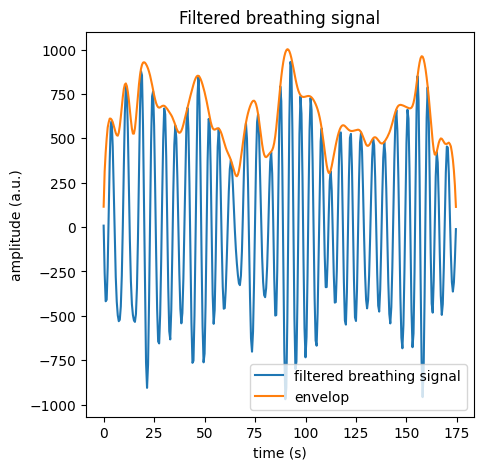

In [14]:
py.figure(2, figsize=[5,5])
py.clf()
py.plot(t, x_bp, label='filtered breathing signal')
py.plot(t, np.abs(xa), label='envelop')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('Filtered breathing signal')
py.legend(loc='lower right')


<br>
    The angle of the Hilbert transform gives the instaneous phase of the signal.<br>
    Q: Comment the figure.<br>
    <b>Answer:</b>
    The wrapped phase oscillates between $-\pi$ and $\pi$ and jumps abruptly at the end of every cycle.
    The unwrapped phase removes this jump and produces a smooth and steadily increasing curve. The slope of this curve shows how quickly the breathing cycles are occuring.
    <br>
    Q: What is the role of the unwrap function<br>
    <b>Answer:</b>
    It removes the $\pm 2\pi$ jumps between the cycles in the phase representation, giving a continuous phase curve. This is important for calculating the instantaneous frequency, because without unwrapping the derivative would be dominated by the spikes from the jumps and meaningless.
    <br>

estimate the instantaneous phase from the Hilbert transform

In [8]:
phi_xa = np.angle(xa)
# phase is bounded between -pi and pi -> reconstruct continuous signal
phi_xa_unw = np.unwrap(phi_xa)

Text(0, 0.5, 'instantaneous phase unwrapped (rad)')

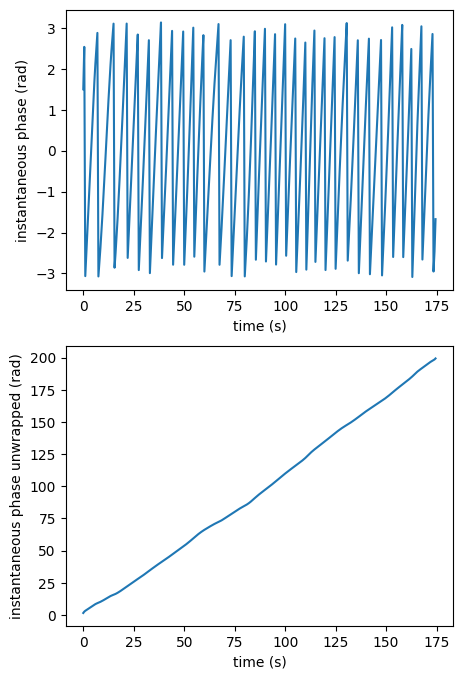

In [9]:
py.figure(3, figsize=[5, 8])
py.clf()
py.subplot(2,1,1)
py.plot(t, phi_xa)
py.xlabel('time (s)')
py.ylabel('instantaneous phase (rad)')
py.subplot(2,1,2)
py.plot(t, phi_xa_unw)
py.xlabel('time (s)')
py.ylabel('instantaneous phase unwrapped (rad)')


<br>
    The time derivate of the instantaneous phase is the instantaneous frequency of the signal.<br>
    Q: Comment the figure.<br>
    <b>Answer:</b>
    The first plot shows the raw breathing signal with its oscillatory pattern, while the second one shows the instantaneous breathing rate (in bpm) calculated from the derivative of the unwrapped phase. The breathing rate fluctuates around a stable value, showing how respiration rate evolves over time.
    <br>
    Q: Compare the original waveform with the estimation of the breathing frequency<br>
    <b>Answer:</b>
    The waveform shows the actual inhalation/exhalation cycles, while the frequency estimation condenses this into the breathing rate at each moment. It gives a direct measure of breathing dynamics over time, which is easier to interpret and analyze than counting cycles in the original waveform.
    <br>

compute the derivative of the phase (angular frequency).

In [10]:
d_phi = np.diff(phi_xa_unw)
# convert angular frequency to frequency.
d_phi /= 2*np.pi
# convert digital frequency to analog frequency and in breathing per minute
# (bpm)
d_phi *= fs*60

Text(0, 0.5, 'breathing rate (bpm)')

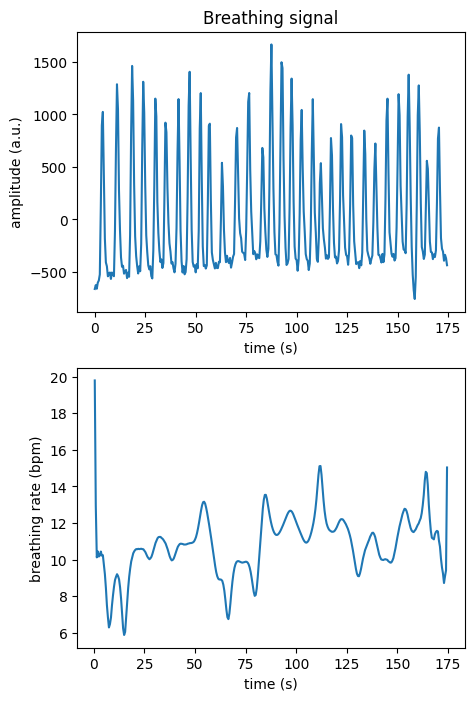

In [11]:
py.figure(4, figsize=[5,8])
py.clf()
py.subplot(2,1,1)
py.plot(t, x, label='breathing signal')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('Breathing signal')
py.subplot(2,1,2)
py.plot(t[1:], d_phi)
py.xlabel('time (s)')
py.ylabel('breathing rate (bpm)')